In [2]:
#-------------------- Import Libraries ------------------------------------------------------------------------------

In [3]:
%pip show seaborn
%pip install seaborn
import seaborn as sns



Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: c:\Users\karth\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#-------------------- API Call, Error handling and loading data into DataFrame --------------------------------------------------

In [6]:
# Get dataset from the API
#-----------------------
url ="https://data.cdc.gov/resource/7b9s-s8ck.json"  # 200, Data fetched successfully.

# Wrong URL - Getting 404 HTTP Error
#-------------------------------------
# url ="https://data.cdc.gov/resources/7b9s-s8ck.json"  # 404
      # HTTP error occurred: 404 Client Error: Not Found for url: https://data.cdc.gov/resources/7b9s-s8ck.json

# Handling the error using try-except block
#-------------------------------------------

try:
    response = requests.get(url)
    print(response.status_code)  # Check 200 if the request was successful
    response.raise_for_status()  # Raise an exceptions for bad responses like 404 or 500
    data = response.json()  # Parse the JSON data    
    print("Data fetched successfully.")
except requests.exceptions.HTTPError as err:    
    print(f"HTTP error occurred: {err}")
except requests.exceptions.RequestException as err:
    print(f"API request failed:: {err}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

200
Data fetched successfully.


In [7]:
df = pd.DataFrame(data)
df

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
0,1999,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
1,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
2,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
3,2005,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
4,2012,AL,Autauga,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,Value suppressed,NA,NA,Age group,Ages 35-64 years,Race,American Indian/Alaska Native,Sex,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),665.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,567.7,767.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
996,2013,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),667.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,597.1,747.8,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
997,2004,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),813.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,697.6,919.9,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001
998,2014,AL,Autauga,County,NVSS,Cardiovascular Diseases,Coronary heart disease (CHD),687.9,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,594.1,776.7,Age group,Ages 65 years and older,Race,Overall,Sex,Overall,01001


In [8]:
# -----------------------Checking how many rows and columns in the dataset--------------------------------------------------

In [9]:

df.shape

(1000, 21)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        1000 non-null   object
 1   locationabbr                1000 non-null   object
 2   locationdesc                1000 non-null   object
 3   geographiclevel             1000 non-null   object
 4   datasource                  1000 non-null   object
 5   class                       1000 non-null   object
 6   topic                       1000 non-null   object
 7   data_value                  1000 non-null   object
 8   data_value_unit             1000 non-null   object
 9   data_value_type             1000 non-null   object
 10  data_value_footnote_symbol  1000 non-null   object
 11  data_value_footnote         1000 non-null   object
 12  confidence_limit_low        1000 non-null   object
 13  confidence_limit_high       1000 non-null   objec

In [11]:


#-------------------- Pagination -------------------------------------------------------------------------------------------
rows_per_request = 500000
total_rows = 5770240  # from API info
dfs = []

for offset in range(0, total_rows, rows_per_request):
    url = f"https://data.cdc.gov/resource/7b9s-s8ck.json?$limit={rows_per_request}&$offset={offset}"
    response = requests.get(url)
    data = response.json()
    df_chunk = pd.DataFrame(data)    
    dfs.append(df_chunk)
    print(f"Fetched rows {offset} to {offset + rows_per_request}")
    

# Combine all chunks
df_full = pd.concat(dfs, ignore_index=True)
print(df_full.shape)  

# Output
# Fetched rows 0 to 500000
# Fetched rows 500000 to 1000000
# Fetched rows 1000000 to 1500000
# Fetched rows 1500000 to 2000000
# Fetched rows 2000000 to 2500000
# Fetched rows 2500000 to 3000000
# Fetched rows 3000000 to 3500000
# Fetched rows 3500000 to 4000000
# Fetched rows 4000000 to 4500000
# Fetched rows 4500000 to 5000000
# Fetched rows 5000000 to 5500000
# Fetched rows 5500000 to 6000000
# (5770240, 21)

Fetched rows 0 to 500000
Fetched rows 500000 to 1000000
Fetched rows 1000000 to 1500000
Fetched rows 1500000 to 2000000
Fetched rows 2000000 to 2500000
Fetched rows 2500000 to 3000000
Fetched rows 3000000 to 3500000
Fetched rows 3500000 to 4000000
Fetched rows 4000000 to 4500000
Fetched rows 4500000 to 5000000
Fetched rows 5000000 to 5500000
Fetched rows 5500000 to 6000000
(5770240, 21)


In [12]:
#-----------------------------------------------Data Wrangling-------------------------------------------------------------------

In [13]:
df_full.describe()

,year,locationabbr,locationdesc,geographiclevel,datasource,class,topic,data_value,data_value_unit,data_value_type,...,data_value_footnote,confidence_limit_low,confidence_limit_high,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,locationid
count,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240,...,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240,5770240
unique,23,51,1829,1,1,1,5,34397,2,2,...,2,31455,37979,1,2,1,6,1,3,3136
top,1999,TX,Washington,County,NVSS,Cardiovascular Diseases,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",...,NA,NA,NA,Age group,Ages 35-64 years,Race,Overall,Sex,Overall,56013
freq,250880,467360,57040,5770240,5770240,5770240,1154048,2365475,5268480,5268480,...,3404765,2365475,2365475,5770240,2885120,5770240,2163840,5770240,4327680,1840


In [14]:
# Finding unique values in all columns DataFrame
#--------------------------------------------------------------------------
columns_to_check = [
    'year', 'locationabbr', 'locationdesc', 'geographiclevel', 'datasource',
       'class', 'topic', 'data_value', 'data_value_unit', 'data_value_type',
       'data_value_footnote_symbol', 'data_value_footnote',
       'confidence_limit_low', 'confidence_limit_high',
       'stratificationcategory1', 'stratification1', 'stratificationcategory2',
       'stratification2', 'stratificationcategory3', 'stratification3',
       'locationid'
]

for col in columns_to_check:
    unique_values = df_full[col].unique()
    print(f"Unique values in '{col}':\n{unique_values}\n")


Unique values in 'year':
['1999' '2013' '2014' '2005' '2012' '2010' '2009' '2011' '2007' '2019'
 '2018' '2004' '2016' '2015' '2000' '2002' '2003' '2006' '2008' '2001'
 '2017' '1999 - 2010' '2010 - 2019']

Unique values in 'locationabbr':
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'FL' 'DC' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

Unique values in 'locationdesc':
['Autauga' 'Baldwin' 'Barbour' ... 'Uinta' 'Washakie' 'Weston']

Unique values in 'geographiclevel':
['County']

Unique values in 'datasource':
['NVSS']

Unique values in 'class':
['Cardiovascular Diseases']

Unique values in 'topic':
['All heart disease' 'All stroke' 'Coronary heart disease (CHD)'
 'Cardiovascular disease (CVD)' 'Heart failure']

Unique values in 'data_value':
['NA' '25.7' '29.5' ... '-76.8' '-76' '-74.2']

Unique values in 'data_value_unit':
['p

In [15]:
# Below columns have single value for all rows------------------------------------------
#                         Unique values in 'geographiclevel':
#                         ['County']

#                         Unique values in 'datasource':
#                         ['NVSS']

#                         Unique values in 'stratificationcategory1':
#                         ['Age group']

#                         Unique values in 'stratificationcategory2':
#                         ['Race']

#                         Unique values in 'stratificationcategory3':
#                         ['Sex']

#                         Unique values in 'class':
#                         ['Cardiovascular Diseases']

# Below columns have NA for some rows-----------------------------------------------------

#                         Unique values in 'data_value':
#                         ['NA' '128.7' '128.1' ... '-62.7' '-60.7' '-56.9']

#                         Unique values in 'data_value_footnote_symbol':
#                         ['~' 'NA']

#                         Unique values in 'data_value_footnote':
#                         ['Value suppressed' 'NA']

#                         Unique values in 'confidence_limit_low':
#                         ['NA' '113.1' '114.1' ... '-73.8' '-70.3' '-65.9']

#                         Unique values in 'confidence_limit_high':
#                         ['NA' '144.7' '145.5' ... '-48.5' '-52.4' '-47.3']

# Year column cleaning for range '1999 - 2010' '2010 - 2019'-----------------------------------------------
#                         Unique values in 'year':
#                             ['1999' '2013' '2014' '2005' '2012' '2010' '2009' '2011' '2007' '2019'
#                             '2018' '2004' '2016' '2015' '2000' '2002' '2003' '2006' '2008' '2001'
#                             '2017' '1999 - 2010' '2010 - 2019']

# Checking for null values in the DataFrame

# Checking for duplicate values in the DataFrame

In [16]:
# Dropping columns with single value in all rows-------------------------------------------------------------------------------
print(f"Rows and Columns before dropping columns: {df_full.shape}")
cols_to_drop = ['geographiclevel','datasource','class', 'stratificationcategory1', 'stratificationcategory2', 
                'stratificationcategory3','data_value_footnote_symbol','data_value_footnote']
df_full = df_full.drop(columns=cols_to_drop)
print(f"Rows and Columns after dropping columns: {df_full.shape}")  # Should reflect the columns dropped
df_full

Rows and Columns before dropping columns: (5770240, 21)
Rows and Columns after dropping columns: (5770240, 13)


,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
0,1999,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
1,2013,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
2,2014,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
3,2005,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
4,2012,AL,Autauga,All heart disease,NA,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",NA,NA,Ages 35-64 years,American Indian/Alaska Native,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770235,1999 - 2010,WY,Weston,Coronary heart disease (CHD),-33.4,%,Total percent change,-46.3,-19.5,Ages 65 years and older,White,Overall,56045
5770236,2010 - 2019,WY,Weston,Cardiovascular disease (CVD),-6.7,%,Total percent change,-20.4,5.7,Ages 65 years and older,White,Overall,56045
5770237,1999 - 2010,WY,Weston,Cardiovascular disease (CVD),-31.5,%,Total percent change,-41,-20.4,Ages 65 years and older,White,Overall,56045
5770238,1999 - 2010,WY,Weston,Heart failure,-20,%,Total percent change,-41.7,-2.9,Ages 65 years and older,White,Overall,56045


In [17]:
#---------------------------------Checking for duplicate values in ALL HEART DISEASE DataFrame--------------------------------

In [18]:
# Returns a boolean Series showing True for duplicated rows (except first occurrence)
print(f"Number of duplicated row: {df_full.duplicated().sum()}")
print(df_full.duplicated().value_counts())
print(df_full.duplicated().unique())


Number of duplicated row: 0
False    5770240
Name: count, dtype: int64
[False]


In [19]:
#-----------------------------------------cleaning NA values-----------------------------------------------------------------------

In [20]:
print(f"Rows and Columns before cleaning NA values: {df_full.shape}")
df_full = df_full[df_full['data_value'] != 'NA']
print(f"Rows and Columns after cleaning NA values: {df_full.shape}")  # Should reflect the rows dropped
df_full


Rows and Columns before cleaning NA values: (5770240, 13)
Rows and Columns after cleaning NA values: (3404765, 13)


,year,locationabbr,locationdesc,topic,data_value,data_value_unit,data_value_type,confidence_limit_low,confidence_limit_high,stratification1,stratification2,stratification3,locationid
53,2016,AL,Autauga,All stroke,25.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",21.3,30.9,Ages 35-64 years,Overall,Overall,01001
79,2011,AL,Autauga,All stroke,29.5,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",22.9,39.7,Ages 35-64 years,Overall,Men,01001
106,2017,AL,Autauga,All stroke,33.6,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",25.4,44.1,Ages 35-64 years,Overall,Men,01001
108,2017,AL,Autauga,All heart disease,128.7,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",113.1,144.7,Ages 35-64 years,Overall,Overall,01001
109,2016,AL,Autauga,All heart disease,128.1,"per 100,000","Age-Standardized, Spatiotemporally Smoothed Rate",114.1,145.5,Ages 35-64 years,Overall,Overall,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770235,1999 - 2010,WY,Weston,Coronary heart disease (CHD),-33.4,%,Total percent change,-46.3,-19.5,Ages 65 years and older,White,Overall,56045
5770236,2010 - 2019,WY,Weston,Cardiovascular disease (CVD),-6.7,%,Total percent change,-20.4,5.7,Ages 65 years and older,White,Overall,56045
5770237,1999 - 2010,WY,Weston,Cardiovascular disease (CVD),-31.5,%,Total percent change,-41,-20.4,Ages 65 years and older,White,Overall,56045
5770238,1999 - 2010,WY,Weston,Heart failure,-20,%,Total percent change,-41.7,-2.9,Ages 65 years and older,White,Overall,56045


In [21]:
#----------------------------------Checking for null, NAN and missing values in DataFrame --------------------------------------------

In [22]:
#checking for null values in the DataFrame-----------------------------------------------------------------------
print(df_full.isnull().values.any()) # NAN, null, missing values


False


In [23]:
print(f"df_full shape before dropping rows with missing values: {df_full.shape}")
df_full.dropna()  # Drop rows with any missing values
print(f"df_full shape after dropping rows with missing values: {df_full.shape}")  # Should reflect the rows dropped
df_full.shape


df_full shape before dropping rows with missing values: (3404765, 13)
df_full shape after dropping rows with missing values: (3404765, 13)


(3404765, 13)

In [24]:
#=====================================Renaming and formatting Columns name==========================================================
# locationabbr              => State
# locationdesc              => County name
# topic                     => Category
# data_value                => 
# data_value_unit           => 
# data_value_type           => 
# confidence_limit_low      => 
# confidence_limit_high     => 
# stratification1           => 
# stratification2           => 
# stratification3           => 
# locationid                =>

In [25]:
print(f"column names before renaming: {df_full.columns}")

df_full.rename(columns={
    'stratification1': 'AgeGroup',
    'stratification2': 'Race',
    'stratification3': 'Sex',
    'locationabbr': 'State',
    'locationdesc': 'CountyName',
    'topic': 'Category',
    'year': 'Year',
    'data_value': 'Data_Value',
    'data_value_unit': 'DataValueUnit',
    'data_value_type': 'DataValueType',
    'confidence_limit_low': 'ConfidenceLimitLow',
    'confidence_limit_high': 'ConfidenceLimitHigh',
    'locationid': 'LocationId'
}, inplace=True)

print(f"column names after renaming: {df_full.columns}")



column names before renaming: Index(['year', 'locationabbr', 'locationdesc', 'topic', 'data_value',
       'data_value_unit', 'data_value_type', 'confidence_limit_low',
       'confidence_limit_high', 'stratification1', 'stratification2',
       'stratification3', 'locationid'],
      dtype='object')
column names after renaming: Index(['Year', 'State', 'CountyName', 'Category', 'Data_Value',
       'DataValueUnit', 'DataValueType', 'ConfidenceLimitLow',
       'ConfidenceLimitHigh', 'AgeGroup', 'Race', 'Sex', 'LocationId'],
      dtype='object')


C:\Users\karth\AppData\Local\Temp\ipykernel_18852\1506995194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full.rename(columns={


In [26]:
#------------------------------------Decimal Value Rounding for columns------------------------------------------------------------

In [27]:
df_full[['Data_Value', 'ConfidenceLimitLow', 'ConfidenceLimitHigh']] = df_full[[
    'Data_Value', 'ConfidenceLimitLow', 'ConfidenceLimitHigh']].round(2)
print(f'''Decimal values after rounded to 2 decimal places for Data_Value, ConfidenceLimitLow, and ConfidenceLimitHigh columns:
      {df_full[['Data_Value', 'ConfidenceLimitLow', 'ConfidenceLimitHigh']].head()}''')

C:\Users\karth\AppData\Local\Temp\ipykernel_18852\2386066250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full[['Data_Value', 'ConfidenceLimitLow', 'ConfidenceLimitHigh']] = df_full[[


Decimal values after rounded to 2 decimal places for Data_Value, ConfidenceLimitLow, and ConfidenceLimitHigh columns:
          Data_Value ConfidenceLimitLow ConfidenceLimitHigh
53        25.7               21.3                30.9
79        29.5               22.9                39.7
106       33.6               25.4                44.1
108      128.7              113.1               144.7
109      128.1              114.1               145.5


In [28]:
#-----------------------Installing MySQL Database -------------------------------------------------------------------------------
# putting DataFrame into a table in a database
# MySQL installation - pip install pymysql sqlalchemy pandas - in Python
                    #  -  !pip install pymysql sqlalchemy pandas - in Jupyter Notebook
# Creating a Database
# Creating a table
# Writing DataFrame into MySQL table

# pip installation command inside JupyterNotebook
# n Jupyter notebooks (especially IPython 7+), %pip is the recommended and more reliable way

%pip install pymysql sqlalchemy pandas

# 'pip' is not recognized as an internal or external command,
# operable program or batch file.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
#-----------------------------Creating a Database -------------------------------------------------------------
# mysql -u root -p

In [30]:
import pymysql

# Connect to MySQL server (not to a specific database yet)
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123'  # replace with your MySQL root password
)

cursor = conn.cursor()

# Create a new database
cursor.execute("CREATE DATABASE IF NOT EXISTS Cardiovascular_Disease;")

# Clean up
# cursor.close()
# conn.close()


1

In [31]:
#-----------------------------------Checking if Database is created------------------------------------------------------------
# Show databases
cursor.execute("SHOW DATABASES;")
databases = cursor.fetchall()
print(databases)

cursor.close()
conn.close()

# Got ProgrammingError: Cursor close(), conn.close() in the previous cell. Commented it.

(('banking_case',), ('cardiovascular_disease',), ('information_schema',), ('mysql',), ('performance_schema',), ('sys',))


In [32]:
#------------------------------Creating mortality_rate table in the Cardiovascular_Disease -----------------------------------------

In [33]:
# create a table mortality_rate in  Cardiovascular_Disease Database

# Step 1: Connect to the specific database
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='Cardiovascular_Disease'  # connect directly to the DB
)

cursor = conn.cursor()

# Step 2: Create a table using SQL
cursor.execute("""
CREATE TABLE IF NOT EXISTS mortality_rate (
    id INT AUTO_INCREMENT PRIMARY KEY,
    year varchar(4),
    locationabbr VARCHAR(2),
    locationdesc VARCHAR(20),
    data_value FLOAT(10,2),    
    confidence_limit_low FLOAT(10,2),
    confidence_limit_high FLOAT(10,2),
    stratification1 VARCHAR(50),
    stratification2 VARCHAR(50),
    stratification3 VARCHAR(10),
    locationid int(10)    
);
""")

print("Table 'mortality_rate' created successfully.")

# Clean up
cursor.close()
conn.close()

Table 'mortality_rate' created successfully.


In [34]:
#------------------------------Inserting data into mortality_rate table ---------------------------------------------------------

In [35]:
# Inserting datas into mortality_rate table
from sqlalchemy import create_engine

# MySQL connection details
user = 'root'
password = 'Test123'
host = 'localhost'   # or your DB host
port = 3306
database = 'cardiovascular_disease'
conn = pymysql.connect(host=host, user=user, password=password, database=database)
cursor = conn.cursor()

# Create SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

# Write df_full DataFrame to MySQL table mortality_rate
df_full.to_sql(
    name='mortality_rate',
    con=engine,
    if_exists='replace',
    index=False,
    method='multi',          # send many rows at once
    chunksize=10000          # number of rows per INSERT
)

cursor.execute("SELECT count(*) from mortality_rate;")
row_count = cursor.fetchone()[0]
print(f"Total no. of rows in DataFrame: {len(df_full)}")  # Check the number of rows in the DataFrame
print(f"Total no. of rows in MySQL table: {row_count}") # Check the number of rows inserted
print('Data has written successfully')

# It took 16mins to write into the table 

Total no. of rows in DataFrame: 3404765
Total no. of rows in MySQL table: 3404765
Data has written successfully


In [36]:
#-----------------------------Creating a CSV file from DataFrame to load into Tableau ----------------------------------------------

In [37]:
# Format  	Row Limit	    Tableau Support	    Speed	             Use Case
#----------------------------------------------------------------------------------------
# CSV	     Unlimited	       Yes	            Fast	       Best for large flat data
# Excel	    ~1M rows	       Yes	            Slower	       Good for styled reports
# JSON	    Unlimited	       Yes	            Slower	       Best for nested data

# So I choose CSV format as I have 3M rows and 13 columns in the DataFrame
# It took only 1m 30s to write into the CSV file
df_full.shape
df_full.to_csv('mortality_rate.csv', index=False)

In [38]:
#--------------------------------Matplotlib for Data Visualization------------------------------------------------------------

In [39]:
#--------------------Average Mortality by Year for All Heart Disease (State Level)--------------------------------------------------

Year | Average Mortality Rate
1999 | 910.82
2000 | 883.61
2001 | 857.14
2002 | 846.88
2003 | 821.07
2004 | 766.94
2005 | 754.68
2006 | 717.28
2007 | 687.92
2008 | 676.03
2009 | 646.63
2010 | 637.44
2011 | 617.99
2012 | 607.92
2013 | 608.53
2014 | 600.22
2015 | 606.75
2016 | 596.43
2017 | 597.13
2018 | 591.07
2019 | 586.39


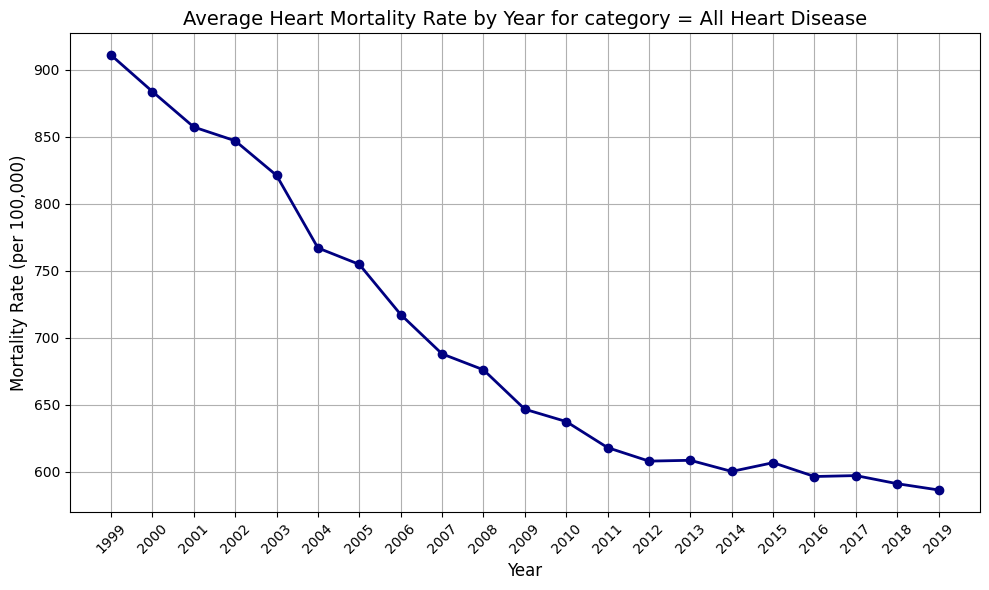

In [40]:
# Average Mortality by Year (State Level)
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='cardiovascular_disease'  
)
cursor = conn.cursor()
cursor.execute("" \
'''SELECT Year, ROUND(AVG(Data_Value), 2) AS avg_mortality_rate FROM mortality_rate
   where Category= 'All heart disease' and Year NOT IN ('1999 - 2010', '2010 - 2019')
   GROUP BY year ORDER BY year;''')
results = cursor.fetchall()
print("Year | Average Mortality Rate")
for row in results:
    print(f"{row[0]} | {row[1]}")
# Step 3: Process results into lists
years = [row[0] for row in results]
rates = [row[1] for row in results]
# Step 4: Plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(years, rates, marker='o', color='navy', linewidth=2)
# Formatting
plt.title('Average Heart Mortality Rate by Year for category = All Heart Disease', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality Rate (per 100,000)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
# Show plot
plt.show()




In [41]:
#----------------------------Average Heart Disease Mortality Rate by State (2019)-------------------------------------------------

Year | Average Mortality Rate
MS | 769.59
AR | 741.59
AL | 739.61
OK | 736.8
LA | 726.5
KY | 703.18
TN | 701.13
WV | 665.26
MO | 659.7
MI | 629.55
OH | 629.25
GA | 620.42
IA | 611.31
IN | 605.24
TX | 588.91
IL | 588.03
PA | 573.34
NV | 571.31
SC | 570.47
VA | 564.58
KS | 563.27
VT | 552.16
MD | 544.96
NM | 537.48
WI | 537.4
MT | 536.17
NC | 533.49
NY | 531.97
NJ | 529.72
NE | 528.16
WY | 514.42
ID | 512.22
UT | 495.16
ME | 490.2
ND | 488.8
FL | 481.94
DE | 480.83
SD | 479.53
NH | 472.41
DC | 468.49
CA | 468.44
AZ | 462.4
HI | 459.78
WA | 454.98
MN | 451.92
CT | 442.24
OR | 440.6
RI | 434.14
CO | 424.22
MA | 394.56
AK | 363.98


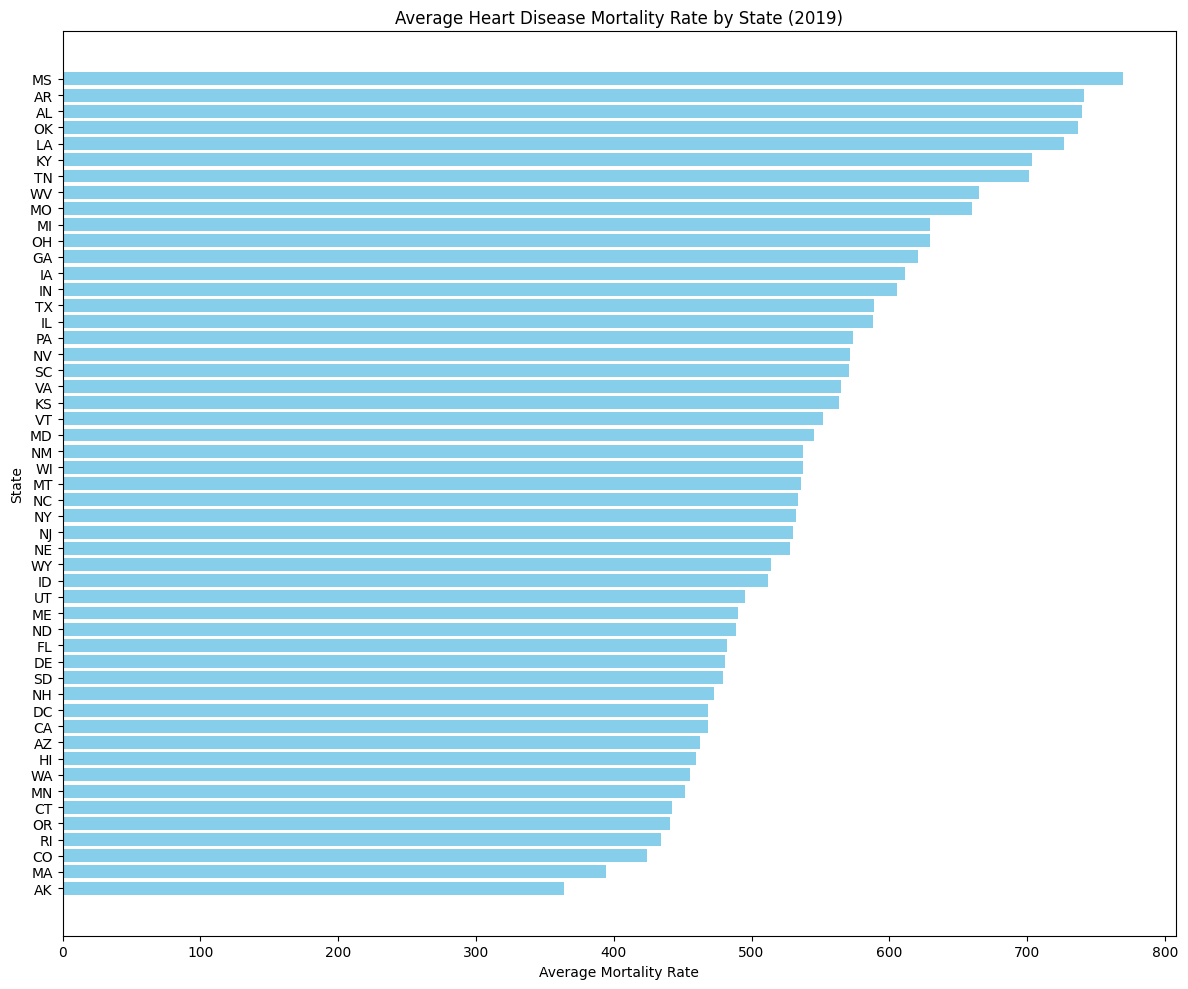

In [42]:
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='Test123',
    database='Cardiovascular_Disease'  # connect directly to the DB
)
cursor = conn.cursor()
# Average Mortality by State for the Year 2019
cursor.execute('''SELECT State, ROUND(AVG(Data_Value), 2) AS avg_mortality_rate FROM mortality_rate
WHERE year = 2019 and Category ='All heart disease' GROUP BY State ORDER BY avg_mortality_rate DESC;''')
results = cursor.fetchall()
print("Year | Average Mortality Rate")
for row in results:
    print(f"{row[0]} | {row[1]}")
# Separate data into two lists for plotting
states = [row[0] for row in results]
rates = [row[1] for row in results]
# Plotting
plt.figure(figsize=(12, 10))
plt.barh(states, rates, color='skyblue')
plt.xlabel('Average Mortality Rate')
plt.ylabel('State')
plt.title('Average Heart Disease Mortality Rate by State (2019)')
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()    

In [43]:
#**************************Seaborn for Data Visualization*******************************************************

In [44]:
# categorical_columns = df_full['Year', 'State', 'CountyName', 'Category', 'Data_Value','State','Race','AgeGroup','Sex'].columns
# for col in categorical_columns:
#     print(f"Unique values in '{col}'")
#     display(df_full[col].value_counts())